In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,roc_auc_score
from time import time
import xgboost as xgb
import pickle

In [ ]:
data = pd.read_csv('hcare.csv')

In [ ]:
print(f'Dataset shape: {data.shape}')

In [ ]:
data.head()

,Unnamed: 0,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,1.0,8.0,c,3.0,Z,3.0,radiotherapy,R,F,2.0,31397.0,7.0,Emergency,Extreme,2.0,51-60,4911.0,0-10
1,2,2.0,2.0,c,5.0,Z,2.0,radiotherapy,S,F,2.0,31397.0,7.0,Trauma,Extreme,2.0,51-60,5954.0,41-50
2,3,3.0,10.0,e,1.0,X,2.0,anesthesia,S,E,2.0,31397.0,7.0,Trauma,Extreme,2.0,51-60,4745.0,31-40
3,4,4.0,26.0,b,2.0,Y,2.0,radiotherapy,R,D,2.0,31397.0,7.0,Trauma,Extreme,2.0,51-60,7272.0,41-50
4,5,5.0,26.0,b,2.0,Y,2.0,radiotherapy,S,D,2.0,31397.0,7.0,Trauma,Extreme,2.0,51-60,5558.0,41-50


In [ ]:
data.dtypes

In [ ]:
data.isnull().sum()

Removing case_id, patient and City_Code_Patient ID as they are irrelevant to the patient's length of stay. Two pairs, "Hospital_region_code" and "City_Code_Hospital" as well as "Hospital_code" and "Hospital_type_code," we found high mutual information, so we will discard Hospital_code and City_Code_Hospital as well.



In [ ]:
data.drop(['case_id', 'patientid', 'City_Code_Patient', 'Hospital_code', 'City_Code_Hospital'  ], axis=1, inplace=True)

In [ ]:
data.head()

Removing the missing instance of the Bed Grade feature. 

In [ ]:
data.dropna(subset = ['Bed Grade'], inplace = True)

In [ ]:
data.isnull().sum()

In [ ]:
data.head()

In [ ]:
print(f'Duplicates in the dataset: {data.duplicated().sum()}')
print(f'Percentage of duplicates: {data.duplicated().sum()/len(data)*100}%')

Duplicates in the dataset: 0
Percentage of duplicates: 0.0%


Removing Duplicates

In [ ]:
data = data.drop_duplicates()


In [ ]:
print(f'Duplicates in the dataset: {data.duplicated().sum()}')
print(f'Percentage of duplicates: {data.duplicated().sum()/len(data)*100}%')

Duplicates in the dataset: 0
Percentage of duplicates: 0.0%


In [ ]:
print(f'Dataset shape: {data.shape}')

Dataset shape: (318325, 14)


Review data

In [ ]:
for feature in data.columns: 
    if data[feature].dtype == object:
        print('\nFeature:',feature)
        print(pd.Categorical(data[feature].unique()))

In [ ]:
data.dtypes

Encoding of data 

In [ ]:
#admission_encode  = {'Trauma': 1, 'Urgent': 2, 'Emergency' : 3 }
#severity_encode   = {'Minor': 1, 'Moderate': 2, 'Extreme': 3 }


#data['Type of Admission']  =  data['Type of Admission'].map (admission_encode)
#data['Severity of Illness']  =  data['Severity of Illness'].map (severity_encode)

In [ ]:
#data['Stay'] .replace ('More than 100 Days', '100+', inplace=True)

In [ ]:
#'''data['Stay']= data['Stay'].replace({'0-10':1, '11-20':2, '21-30':3, '31-40':4, '41-50':5, '51-60':6,'61-70':7,
 #                                     '71-80':8,'81-90':9,'91-100':10,'100+':11})

#data['Age']= data['Age'].replace({'0-10':1, '11-20':2, '21-30':3, '31-40':4, '41-50':5, '51-60':6,'61-70':7,
 #                                     '71-80':8,'81-90':9,'91-100':10})'''

In [ ]:
LE=LabelEncoder()
data['Type of Admission'] = LE.fit_transform(data['Type of Admission'])
data['Severity of Illness'] = LE.fit_transform(data['Severity of Illness'])
data['Age'] = LE.fit_transform(data['Age'])
data['Hospital_type_code']=LE.fit_transform(data['Hospital_type_code'])
data['Hospital_region_code']=LE.fit_transform(data['Hospital_region_code'])
data['Department']=LE.fit_transform(data['Department'])
data['Ward_Type']=LE.fit_transform(data['Ward_Type'])
data['Ward_Facility_Code']=LE.fit_transform(data['Ward_Facility_Code'])
data['Bed Grade']=LE.fit_transform(data['Bed Grade'])
data['Stay'] = LE.fit_transform(data['Stay'])


In [ ]:
data.dtypes

Unnamed: 0                           int64
Hospital_type_code                   int64
Hospital_region_code                 int64
Available Extra Rooms in Hospital    int64
Department                           int64
Ward_Type                            int64
Ward_Facility_Code                   int64
Bed Grade                            int64
Type of Admission                    int64
Severity of Illness                  int64
Visitors with Patient                int64
Age                                  int64
Admission_Deposit                    int64
Stay                                 int64
dtype: object

In [ ]:
data.nunique()

In [ ]:
data.head()

Splitting the data set

In [ ]:
X = data.iloc[:, :-1].values
Y = data.iloc[:, -1].values

In [ ]:
np.shape(X)

#np.shape(Y)

(318325, 13)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 5)

In [ ]:
print(X_train)

In [ ]:
print(X_train[:,-3:])

Feature Scaling of Amount deposit and Visitors with patient

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

#for visitors with patient feature 
X_train[:,-3:-2] = sc.fit_transform(X_train[:,-3:-2])
X_test[:,-3:-2] = sc.transform(X_test[:,-3:-2])

#for amount deposit feature 
X_train[:,-1:] = sc.transform(X_train[:,-1:])
X_test[:,-1:] = sc.transform(X_test[:,-1:])

In [ ]:
values= [RandomForestClassifier(), KNeighborsClassifier(), LogisticRegression(), DecisionTreeClassifier(), GaussianNB()]

keys= ['RandomForsetClassifier',
      'KNeighborsClassifier', 
       'LogisticRegression', 
       'DecisionTreeClassifier', 
       'GaussianNB']

models= dict(zip(keys,values))
accuracy_scores=[]
train_times=[]

for key,value in models.items():
  t = time()
  value.fit(X_train,Y_train)
  duration = (time() - t) / 60
  Y_pred= value.predict(X_train)
  accuracy= accuracy_score(Y_train, Y_pred)
  accuracy_scores.append(accuracy)
  train_times.append(duration)   
  print(key)
  print(round(accuracy * 100, 2))

RandomForsetClassifier
100.0
KNeighborsClassifier
45.73


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression
27.89
DecisionTreeClassifier
100.0
GaussianNB
28.46


In [ ]:
values= [RandomForestClassifier(), KNeighborsClassifier(), LogisticRegression(), DecisionTreeClassifier(), GaussianNB()]

keys= ['RandomForsetClassifier',
      'KNeighborsClassifier', 
       'LogisticRegression', 
       'DecisionTreeClassifier', 
       'GaussianNB']

models= dict(zip(keys,values))
accuracy_scores=[]
train_times=[]

for key,value in models.items():
  t = time()
  value.fit(X_train,Y_train)
  duration = (time() - t) / 60
  Y_pred= value.predict(X_test)
  accuracy= accuracy_score(Y_test, Y_pred)
  accuracy_scores.append(accuracy)
  train_times.append(duration)   
  print(key)
  print(round(accuracy * 100, 2))

RandomForsetClassifier
33.61
KNeighborsClassifier
23.65


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression
28.35
DecisionTreeClassifier
25.81
GaussianNB
28.87


#Training the Random Forest Classification model on the Training set

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 445, max_depth=13, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', max_depth=13, n_estimators=445,
                       random_state=0)

#**Predicting the Test set results**

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), Y_test.reshape(len(Y_test),1)),1))

#Making the Confusion **Matrix** **bold text**

0.3981283422459893


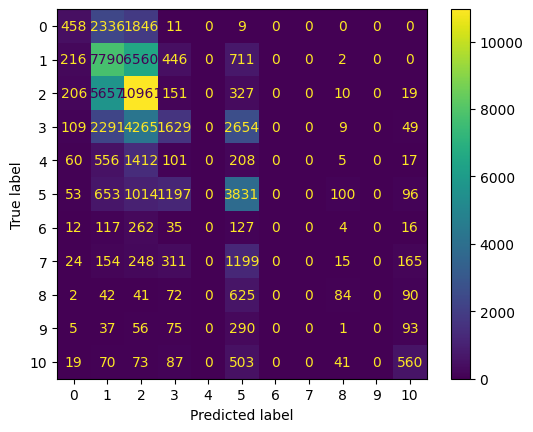

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, y_pred)

print(accuracy_score(Y_test, y_pred))

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
model1 = RandomForestClassifier(criterion='log_loss', max_depth=3)
model1.fit(X_train, Y_train)
model1.predict(X_test)
print(accuracy_score(Y_test, Y_pred))

0.35753381566530357


#new packages

In [ ]:
# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

#Hyperparameter tuning - searching for best model

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
param_dist = {'n_estimators': randint(50, 500),
              'max_depth': randint(1,20)}

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(classifier, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, Y_train)


#**Choosing the best model from options**

In [ ]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

#**More Evaluation Metrics**

In [ ]:
# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(Y_test, y_pred)


ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
accuracy_score(Y_test, y_pred)

XG Boost

In [ ]:
# Define the XGBoost classifier and set hyperparameters
XGB = xgb.XGBClassifier(
    max_depth=5,
    n_estimators=200,
    learning_rate=0.1,
    objective='multi:softmax',
    num_class=11,
    random_state=42
)

In [ ]:
X_train

In [ ]:
# Fit the model to the training data
model=XGB.fit(X_train,Y_train)

Below code for saving the model in drive ( change the location accordingly) 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

with open('/content/drive/My Drive/Colab Notebooks/Math in DS/model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [ ]:
with open('/content/drive/My Drive/Colab Notebooks/Math in DS/model.pkl', 'rb') as f:
    model = pickle.load(f)

In [ ]:
# Make predictions on the testing data
y_pred_1 = model.predict(X_train)

# Evaluate the model's accuracy
accuracy = accuracy_score(Y_train, y_pred_1)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 42.61%


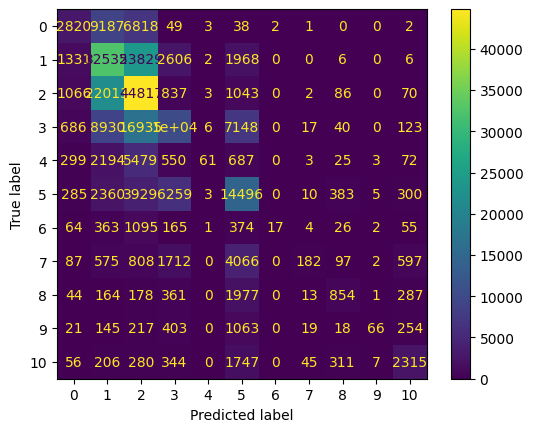

In [ ]:
cm = confusion_matrix(Y_train, y_pred_1)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
cm = confusion_matrix(Y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

21-30                 71325
11-20                 60815
31-40                 45354
51-60                 29606
0-10                  17406
41-50                  9368
71-80                  8691
More than 100 Days     5555
81-90                  4126
91-100                 2374
61-70                  2235
Name: Stay, dtype: int64


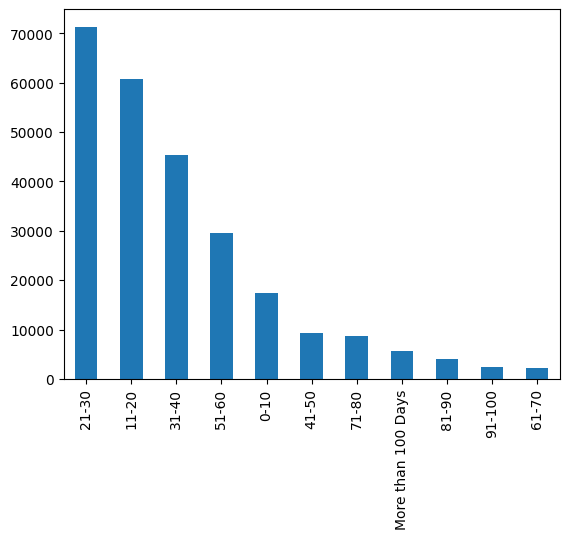

In [ ]:
import pandas as pd

def check_imbalance_class(df, target_col):
    target_counts = df[target_col].value_counts()
    target_counts.plot(kind='bar')
    print(target_counts)

# Example usage
df = data
check_imbalance_class(df, 'Stay')


In [13]:
data.describe()

,Unnamed: 0,case_id,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Visitors with Patient,Admission_Deposit
count,256856.000000,256856.000000,256855.000000,256855.000000,256855.000000,256742.000000,256855.000000,253412.000000,256855.000000,256855.000000
mean,128428.500000,128427.599998,18.466995,4.782796,3.170914,2.624487,65778.782181,7.109004,3.298114,4901.898231
std,74148.084709,74147.928828,8.628928,3.094594,1.148905,0.872797,37950.118301,4.554070,1.779657,1073.613664
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1800.000000
25%,64214.750000,64213.750000,11.000000,2.000000,2.000000,2.000000,32915.000000,4.000000,2.000000,4215.000000
50%,128428.500000,128427.500000,19.000000,5.000000,3.000000,3.000000,65813.000000,8.000000,3.000000,4765.000000
75%,192642.250000,192641.250000,26.000000,7.000000,4.000000,3.000000,98405.500000,8.000000,4.000000,5426.000000
max,256856.000000,256855.000000,32.000000,13.000000,21.000000,4.000000,131624.000000,37.000000,32.000000,11008.000000
